In [1]:
import pandas as pd
import numpy as np
import spotipy as sp
import os

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd_US_all = pd.read_csv('../spotify_tracks_data/artists.csv')
pd_US_all.head()

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


In [3]:
pd_US = pd_US_all.sort_values('popularity', ascending=False).copy()

pd_US.drop_duplicates(subset= "name", keep= 'first', inplace= True)

pd_US.head()

,id,followers,genres,name,popularity
144481,1uNFoZAHBGtllmzznpCI3s,44606973.0,"['canadian pop', 'pop', 'post-teen pop']",Justin Bieber,100
115489,4q3ewBCX7sLwd24euuV69X,32244734.0,"['latin', 'reggaeton', 'trap latino']",Bad Bunny,98
126338,06HL4z0CvFAxyc27GXpf02,38869193.0,"['pop', 'post-teen pop']",Taylor Swift,98
313676,3TVXtAsR1Inumwj472S9r4,54416812.0,"['canadian hip hop', 'canadian pop', 'hip hop'...",Drake,98
144484,3Nrfpe0tUJi4K4DXYWgMUX,31623813.0,"['k-pop', 'k-pop boy group']",BTS,96


In [4]:
for n in range(0, 100, 10):
    tmp = pd_US[pd_US['popularity']>=n].size
    print(f"There are {tmp} artists with popularity above {n}")
# unique_BI[unique_BI['popularity']>=90]

#ninety_BI = unique_BI[unique_BI['popularity']>=90].copy()


There are 5393300 artists with popularity above 0
There are 1655015 artists with popularity above 10
There are 1007470 artists with popularity above 20
There are 569195 artists with popularity above 30
There are 278245 artists with popularity above 40
There are 113900 artists with popularity above 50
There are 37895 artists with popularity above 60
There are 9855 artists with popularity above 70
There are 2100 artists with popularity above 80
There are 255 artists with popularity above 90


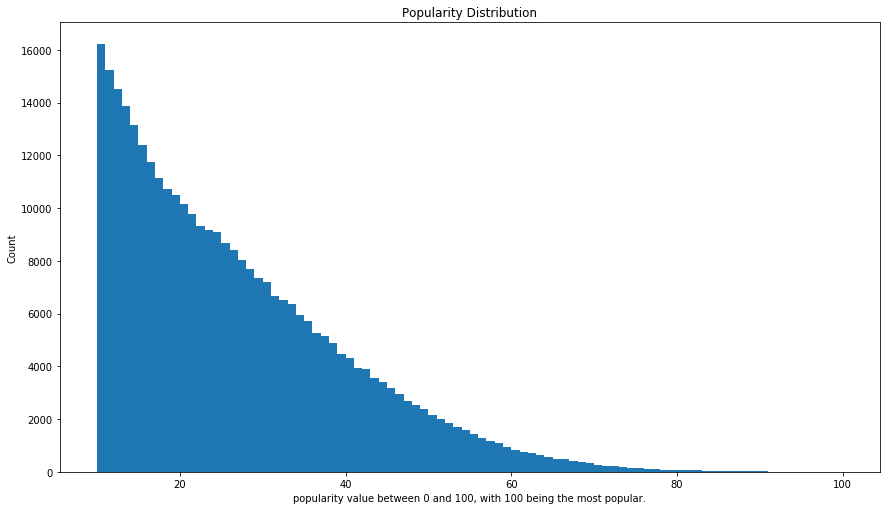

In [5]:
# start with a standard-scaled plot
pd_above_10 = pd_US[pd_US['popularity']>=10].copy()

binsize = 1
bins = np.arange(10, pd_above_10['popularity'].max()+binsize, binsize)
plt.figure(figsize=[14.70, 8.27])

plt.hist(data = pd_above_10, x = 'popularity', bins = bins)
plt.title('Popularity Distribution')
plt.xlabel('popularity value between 0 and 100, with 100 being the most popular.')
plt.ylabel('Count')
plt.show()

In [6]:
pop_bins = pd.cut(pd_above_10['popularity'], bins=10)

pd_above_10.groupby(pop_bins)[['popularity', 'followers']].agg(['count', 'min', 'max', 'mean', 'std'])

popularity                               followers             \
                   count min  max       mean       std     count        min   
popularity                                                                    
(9.91, 19.0]      129509  10   19  14.085152  2.862819    129507        0.0   
(19.0, 28.0]       80292  20   28  23.782805  2.571219     80292        0.0   
(28.0, 37.0]       56212  29   37  32.695190  2.563344     56212        0.0   
(37.0, 46.0]       34604  38   46  41.600682  2.560948     34604        0.0   
(46.0, 55.0]       18346  47   55  50.476398  2.536432     18346        0.0   
(55.0, 64.0]        7980  56   64  59.322682  2.526315      7980        4.0   
(64.0, 73.0]        3001  65   73  68.184938  2.479002      3001        9.0   
(73.0, 82.0]         830  74   82  77.215663  2.494480       830      480.0   
(82.0, 91.0]         202  83   91  85.896040  2.520381       202    12177.0   
(91.0, 100.0]         27  92  100  94.222222  2.292686        27  4438013.0   

                                                       
                      max          mean           std  
popularity                                             
(9.91, 19.0]     228843.0  1.067134e+03  2.608032e+03  
(19.0, 28.0]    1094290.0  2.890823e+03  7.718255e+03  
(28.0, 37.0]     808144.0  7.755475e+03  1.677650e+04  
(37.0, 46.0]    1324958.0  2.215606e+04  4.031605e+04  
(46.0, 55.0]    2188026.0  6.870111e+04  1.114092e+05  
(55.0, 64.0]    4474474.0  2.321814e+05  3.148941e+05  
(64.0, 73.0]    9250478.0  7.584492e+05  8.469660e+05  
(73.0, 82.0]   18120286.0  2.597941e+06  2.387512e+06  
(82.0, 91.0]   33665795.0  9.068057e+06  7.676906e+06  
(91.0, 100.0]  78900234.0  2.868461e+07  1.840966e+07

In [7]:
pop_bins = pd.cut(pd_above_10['popularity'], [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

pd_above_10.groupby(pop_bins)[['popularity', 'followers']].agg(['count', 'min', 'max', 'mean', 'std'])

popularity                               followers            \
                count min  max       mean       std     count       min   
popularity                                                                
(10, 20]       123434  11   20  15.108998  2.869659    123432       0.0   
(20, 30]        84712  21   30  25.219166  2.853878     84712       0.0   
(30, 40]        55309  31   40  35.087364  2.838929     55309       0.0   
(40, 50]        30701  41   50  44.944367  2.822415     30701       0.0   
(50, 60]        13880  51   60  54.722911  2.788202     13880       2.0   
(60, 70]         5027  61   70  64.604138  2.762168      5027       9.0   
(70, 80]         1368  71   80  74.353070  2.774171      1368     466.0   
(80, 90]          303  81   90  84.072607  2.705405       303   12177.0   
(90, 100]          38  91  100  93.289474  2.426296        38  946550.0   

                                                    
                   max          mean           std  
popularity                                          
(10, 20]      228843.0  1.196273e+03  2.901005e+03  
(20, 30]     1094290.0  3.382971e+03  8.448480e+03  
(30, 40]      963817.0  1.025937e+04  2.151873e+04  
(40, 50]     1755942.0  3.420058e+04  5.997577e+04  
(50, 60]     3492917.0  1.246543e+05  1.912459e+05  
(60, 70]     6394966.0  4.777706e+05  5.894852e+05  
(70, 80]    18120286.0  1.813219e+06  1.877976e+06  
(80, 90]    33665795.0  7.084555e+06  6.680226e+06  
(90, 100]   78900234.0  2.377911e+07  1.803182e+07

popularity
(9.91, 19.0]     1.067134e+03
(19.0, 28.0]     2.890823e+03
(28.0, 37.0]     7.755475e+03
(37.0, 46.0]     2.215606e+04
(46.0, 55.0]     6.870111e+04
(55.0, 64.0]     2.321814e+05
(64.0, 73.0]     7.584492e+05
(73.0, 82.0]     2.597941e+06
(82.0, 91.0]     9.068057e+06
(91.0, 100.0]    2.868461e+07
Name: followers, dtype: float64


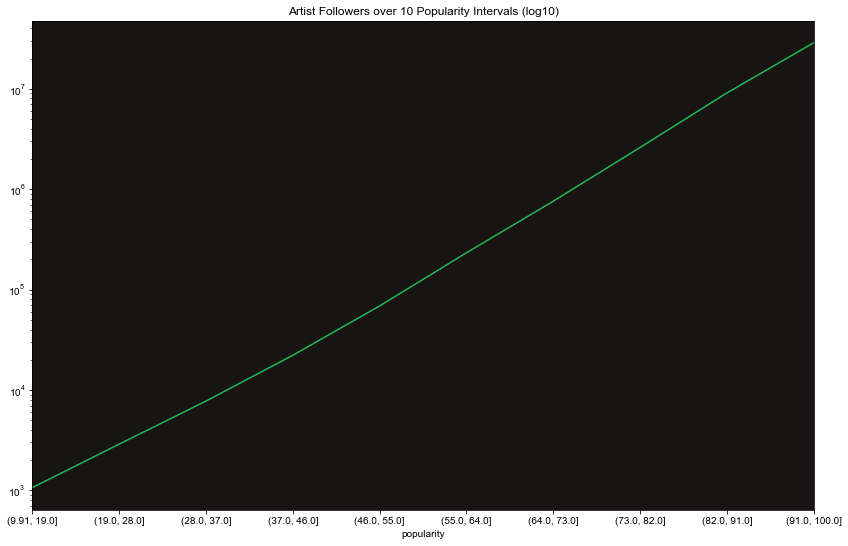

In [8]:
fig, ax = plt.subplots(figsize = (14,9))
ax.set_facecolor('#191414')
ax.grid(False)
sns.set(style='dark')
pop_bins = pd.cut(pd_above_10['popularity'], bins=10)
print(pd_above_10.groupby(pop_bins)['followers'].mean())
pd_above_10.groupby(pop_bins)['followers'].mean().plot(ax=ax, color='#1DB954')
plt.yscale('log')
plt.title('Artist Followers over 10 Popularity Intervals (log10)')
plt.rc('font', size=12)
plt.rc('figure', titlesize=12)

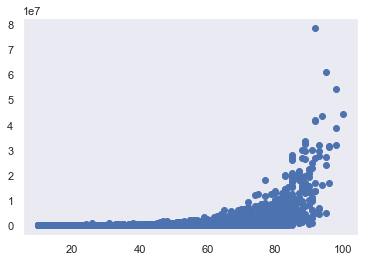

In [9]:
plt.scatter(pd_above_10['popularity'], pd_above_10['followers'])

Text(0.5, 1.0, 'Artist Followers at each Popularity Interval (log10)')

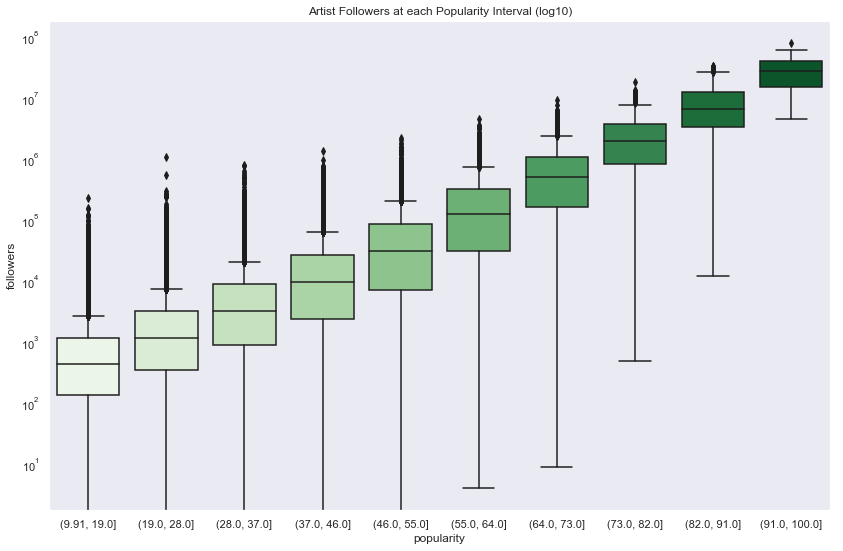

In [10]:
pd_followers = pd_above_10[['popularity', 'followers']]

# pd_followers.boxplot(by=pop_bins, column='followers')
fig, ax = plt.subplots(figsize = (14,9))

sns.set(style='darkgrid')
sns.boxplot(x=pop_bins, y='followers', data=pd_followers, palette='Greens')
#plt.figure(figsize=[14.70, 8.27])
plt.yscale('log')
plt.title('Artist Followers at each Popularity Interval (log10)')
#plt.rc('font', size=20)
#plt.rc('figure', titlesize=20)